In [ ]:
### This notebook generates a plot for one task each time, but the task to represent can be changed by
### changing a word in the code, as indicated below where it says "### SPECIFY HERE WHICH TASK TO REPRESENT"

In [ ]:
cd /files_for_calculating_gradients_group

In [26]:
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('gradient_data/src/')

In [ ]:
BUCKNERatlas = nib.load('Buckner_7Networks_HCPMNIspace.dscalar.nii').get_data()
np.unique(BUCKNERatlas, return_counts=True)

In [29]:
BUCKNERatlas[BUCKNERatlas == 0] = 10000
BUCKNERatlas[BUCKNERatlas < 1.5] = 1000
BUCKNERatlas[BUCKNERatlas < 2.5] = 2000
BUCKNERatlas[BUCKNERatlas < 3.5] = 3000
BUCKNERatlas[BUCKNERatlas < 4.5] = 4000
BUCKNERatlas[BUCKNERatlas < 5.5] = 5000
BUCKNERatlas[BUCKNERatlas < 6.5] = 6000
BUCKNERatlas[BUCKNERatlas < 7.5] = 7000
BUCKNERatlas_VISUAL = BUCKNERatlas[0] == 1000
BUCKNERatlas_VISUAL = BUCKNERatlas_VISUAL.astype(int)
BUCKNERatlas_SOMATOMOTOR = BUCKNERatlas[0] == 2000
BUCKNERatlas_SOMATOMOTOR = BUCKNERatlas_SOMATOMOTOR.astype(int)
BUCKNERatlas_DORSALATTENTION = BUCKNERatlas[0] == 3000
BUCKNERatlas_DORSALATTENTION = BUCKNERatlas_DORSALATTENTION.astype(int)
BUCKNERatlas_VENTRALATTENTION = BUCKNERatlas[0] == 4000
BUCKNERatlas_VENTRALATTENTION = BUCKNERatlas_VENTRALATTENTION.astype(int)
BUCKNERatlas_LIMBIC = BUCKNERatlas[0] == 5000
BUCKNERatlas_LIMBIC = BUCKNERatlas_LIMBIC.astype(int)
BUCKNERatlas_FRONTOPARIETAL = BUCKNERatlas[0] == 6000
BUCKNERatlas_FRONTOPARIETAL = BUCKNERatlas_FRONTOPARIETAL.astype(int)
BUCKNERatlas_DEFAULT = BUCKNERatlas[0] == 7000
BUCKNERatlas_DEFAULT = BUCKNERatlas_DEFAULT.astype(int)

### Generate matrix of each area of representation with either 1 or 0
SUITatlas = nib.load('SUITatlas.dscalar.nii').get_data()
SUITatlas_FIRSTREP = SUITatlas <=10
SUITatlas_FIRSTREP = SUITatlas_FIRSTREP.astype(int)
SUITatlas_SECONDREP_preliminar1 = SUITatlas >10
SUITatlas_SECONDREP_preliminar1 = SUITatlas_SECONDREP_preliminar1.astype(int)
SUITatlas_SECONDREP_preliminar2 = SUITatlas <=22
SUITatlas_SECONDREP_preliminar2 = SUITatlas_SECONDREP_preliminar2.astype(int)
SUITatlas_SECONDREP = SUITatlas_SECONDREP_preliminar1 * SUITatlas_SECONDREP_preliminar2
SUITatlas_THIRDREP = SUITatlas >=23
SUITatlas_THIRDREP = SUITatlas_THIRDREP.astype(int)


NETWORK_TO_PLOT = BUCKNERatlas_FRONTOPARIETAL ### SPECIFY HERE WHICH NETWORK TO REPRESENT
FIRSTREPTEST = NETWORK_TO_PLOT * SUITatlas_FIRSTREP[0]
SECONDREPTEST = NETWORK_TO_PLOT * SUITatlas_SECONDREP[0]
THIRDREPTEST = NETWORK_TO_PLOT * SUITatlas_THIRDREP[0]

In [30]:
res = nib.load('result_cerebellumonly.dscalar.nii').get_data()
res.shape = (8, 18142)
#res_oneline = res.reshape((-1, 1))
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2]
res_component4 = res[3]
res_component5 = res[4]
res_component6 = res[5]
res_component7 = res[6]
res_component8 = res[7]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)
df['e2'] = np.array(res_component3)
df['e3'] = np.array(SECONDREPTEST)
df['e4'] = np.array(FIRSTREPTEST)
df['e5'] = np.array(THIRDREPTEST)
df['e6'] = np.array(res_component4)
df['e9'] = np.array(res_component5)
df['e10'] = np.array(res_component6)
df['e13'] = np.array(res_component7)
df['e14'] = np.array(res_component8)

import matplotlib.cm as cm

norm_1 = mpl.colors.Normalize(vmin=df['e3'].min(), vmax=df['e3'].max())
cmap_1 = cm.Reds
map_1 = cm.ScalarMappable(norm=norm_1, cmap=cmap_1)

norm_2 = mpl.colors.Normalize(vmin=df['e4'].min(), vmax=df['e4'].max())
cmap_2 = cm.Greens
map_2 = cm.ScalarMappable(norm=norm_2, cmap=cmap_2)

norm_3 = mpl.colors.Normalize(vmin=df['e5'].max() * -1, vmax=df['e5'].min() * -1)
cmap_3 = cm.Blues
map_3= cm.ScalarMappable(norm=norm_3, cmap=cmap_3)

c = np.ones(map_1.to_rgba(df['e3']).shape)

a = df['e4'].copy()
a = a - a.min() 
a = a / a.max()
c[:,1] = a

a = df['e3'].copy()
a = a - a.min() 
a = a / a.max()
c[:,2] = a

a = df['e5'].copy()
a = a - a.min() 
a = a / a.max()
c[:,0] = a

In [31]:
sns.set_context(font_scale=2)
sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001})
g = (sns.jointplot('e0', 'e1', 
                   data=df,
                   size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', # alpha=0.8,
                   ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], 
                   xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], 
                   stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1'))

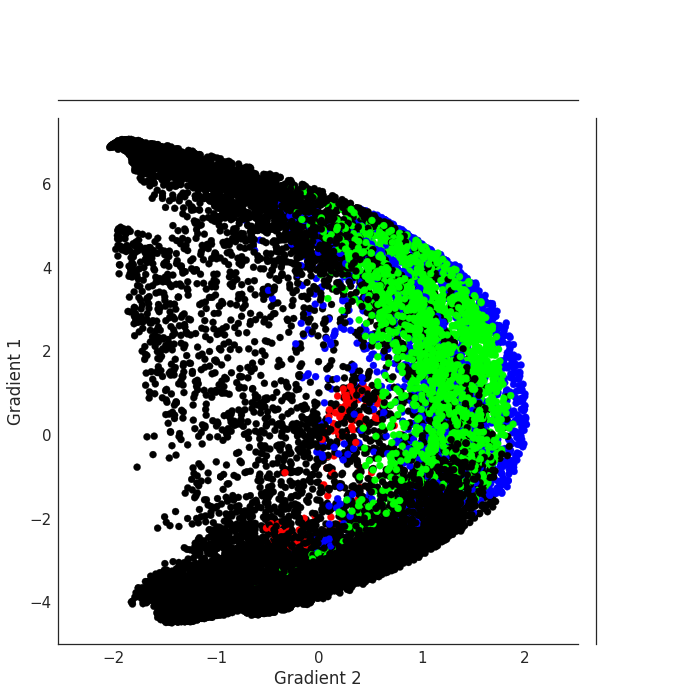

In [32]:
g.ax_joint.scatter(df.e1, df.e0, c=c)
g.savefig(os.path.abspath('figure.png'), format='png', dpi=60, transparent=True)
plt.show()